**Plotting Price and Volume of a Stock**
---

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Retrieve Data from Web (*work-in-progress*)

# Import Data into Environment

In [3]:
columns = {
  'Date': 'date',
  'Open': 'open',
  'High': 'high',
  'Low': 'low',
  'Close': 'close',
  'Adj Close': 'adjusted-close',
  'Volume': 'volume'
}

def ImportData(path):
  df = pd.read_csv(path)
  df.rename(columns=columns, inplace=True)
  df['date'] = df['date'].astype('datetime64[ns]')
  df['is-up'] = np.where((df['close'] - df['open']) > 0, True, False)
  df.set_index(keys='date', inplace=True)
  data = df.round(decimals=2)
  return data

# Plot Historical Data

In [4]:
up_color = 'green'
down_color = 'red'
width_body = 0.5
width_wick = 0.05
figsize = (15, 10)
gridline_alpha = 0.2
labelpad = 10

def ReturnPriceCandleBody(data):
  range = data['close'] - data['open']
  return range # Returns pandas.Series

def ReturnPriceCandleWick(data):
  range = data['high'] - data['low']
  return range # Returns pandas.Series

def AddBarColor(ax, condition, up_color, down_color):
  for i, candle in enumerate(ax):
    if condition.iloc[i] == True:
      candle.set_color(up_color)
    else:
      candle.set_color(down_color)

# Add ordinal index to 'data', then subset DataFrame based on 'day'
def ReturnDayIndexes(data, day):
  df = pd.DataFrame({'date': data.index})
  day_indexes = df[df.date.dt.day_name() == day].index
  return day_indexes # Returns pandas.Index object

# Subset DateTime index of 'data' using 'date_indexes', then format the DateTime objects into strings using 'format'
def ReturnFormattedDatetimeTicks(data, date_indexes, format):
  ticks = [date.strftime(format) for date in data.index[date_indexes]]
  return ticks # Returns list of strings

def ReturnFormattedVolumeTicks(x, pos):
  return '%1.0fM' % (x * 1e-6)

In [9]:
def PlotHistoricalData(ticker_name, data, date_range_start, date_range_end, aggregation='day'):
  aggregation # Will be used for aggregation interval of bars
  df = data[(data.index >= date_range_start) & (data.index <= date_range_end)]
  fig, (price, volume) = plt.subplots(nrows=2, sharex=True, figsize=figsize, height_ratios=[0.75, 0.25], constrained_layout=True)

  # PLOT OHLC CANDLES
  # 'x=range(df.index.size)' removes gaps in plot caused by weekends
  price_body = price.bar(x=range(df.index.size), height=ReturnPriceCandleBody(df), bottom=df['open'], width=width_body)
  price_wick = price.bar(x=range(df.index.size), height=ReturnPriceCandleWick(df), bottom=df['low'], width=width_wick)
  # Color-code OHLC candles based on direction (e.g. close > open = up_day)
  AddBarColor(ax=price_body, condition=df['is-up'], up_color=up_color, down_color=down_color)
  AddBarColor(ax=price_wick, condition=df['is-up'], up_color=up_color, down_color=down_color)

  # PLOT VOLUME BARS
  # 'x=range(df.index.size)' removes gaps in plot caused by weekends
  volume_bar = volume.bar(x=range(df.index.size), height=df['volume'], width=width_body)
  # Color-code bars based on direction (e.g. close > open = up_day)
  AddBarColor(ax=volume_bar, condition=df['is-up'], up_color=up_color, down_color=down_color)

  # FORMAT FIGURE
  fig.suptitle(ticker_name)
  price.grid(axis='x', alpha=gridline_alpha)
  price.set_ylabel(ylabel='Price', labelpad=labelpad)
  volume.grid(axis='y', alpha=gridline_alpha)
  volume.set_ylabel(ylabel='Volume', labelpad=labelpad)
  # Add x-axis ticks & gridlines based on aggregation='day'
  xtick_indexes = ReturnDayIndexes(data=df, day='Monday')
  volume.set_xticks(xtick_indexes)
  # Format x-axis ticks
  ticks = ReturnFormattedDatetimeTicks(df, xtick_indexes, '%b %#d')
  volume.set_xticklabels(ticks)
  # Format y-axis ticks
  volume.yaxis.set_major_formatter(FuncFormatter(ReturnFormattedVolumeTicks))  
  

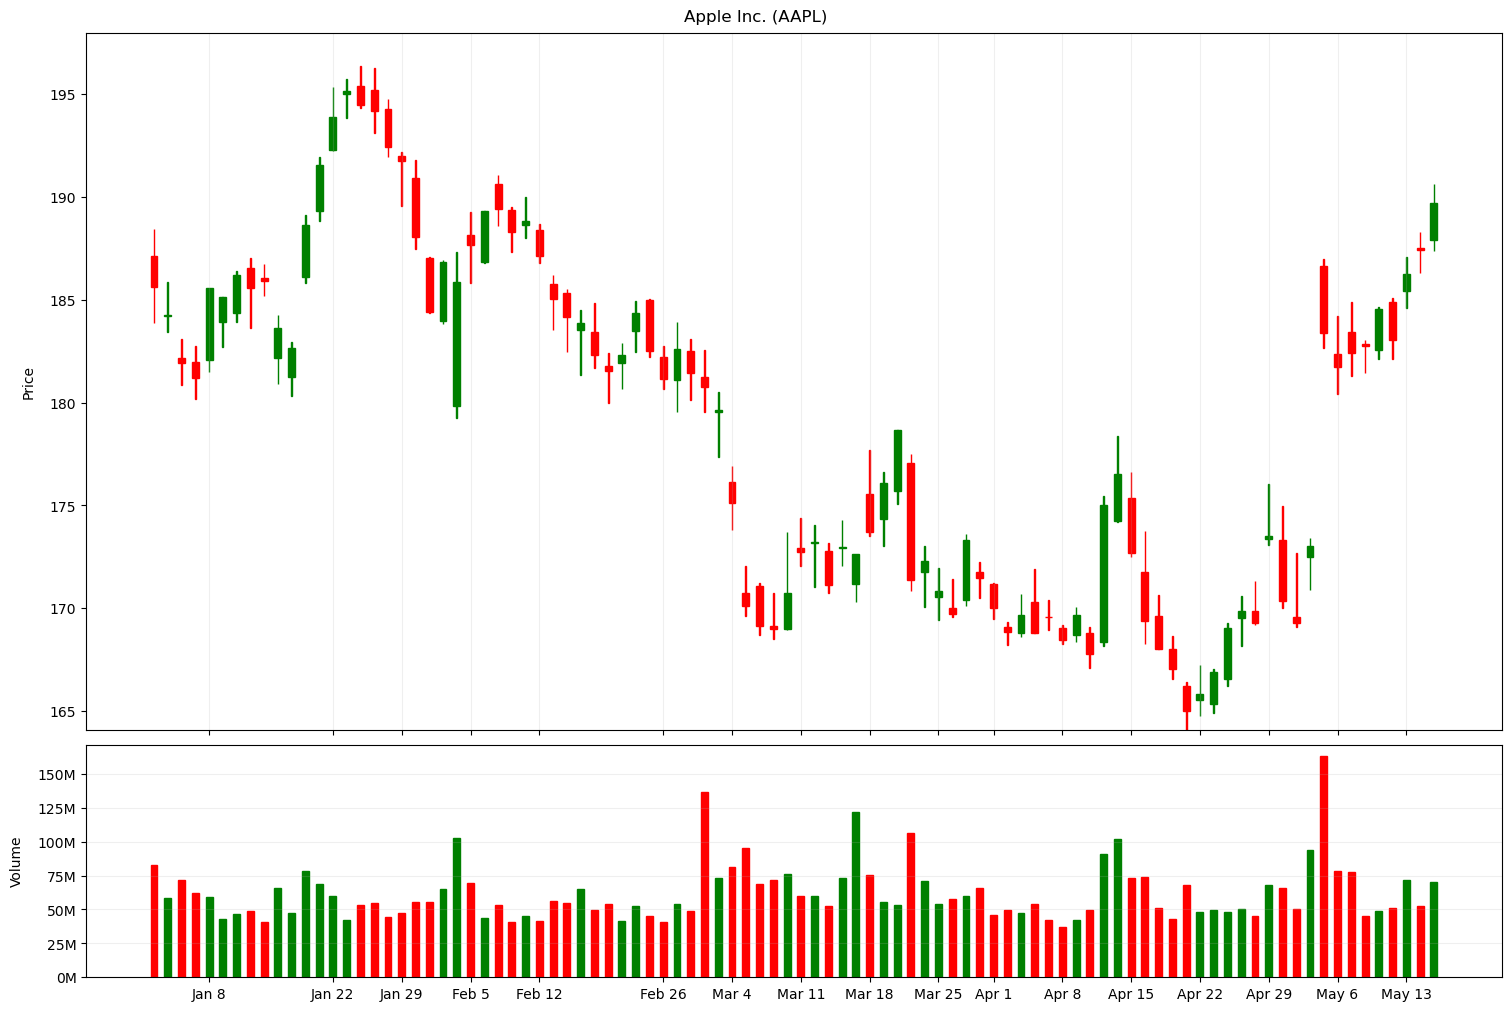

In [11]:
df = ImportData('./AAPL.csv')
PlotHistoricalData('Apple Inc. (AAPL)', df, '2024-01-01', '2024-05-15')